


# **Análisis base de datos US Sales Store**


El presente Notebook es un analisis resultante de la base de datos Sales 

##### *Wilmar Murillo Carmona*

## **Contenido**
   

- <a href="#int">Importación de librerias para el analisis</a><br>
- <a href="#sin">Importación de datos </a><br>
- <a href="#imp">Visualización de la importación de los datos y sus tipos de variables</a><br>
- <a href="#norm">Normalización de datos </a><br>
   - <a href="#var">Variables categoricas</a><br>
   - <a href="#ope">Renombrar variables</a><br>
   - <a href="#ope">Variables float</a><br>
   - <a href="#ope">Normalizar Variable Date</a><br>
- <a href="#transf">Transformación</a><br>      
   - <a href="#ope">Analisis Variable Profit</a><br>
   - <a href="#ope">Analisis Variable Inventory</a><br>
- <a href="#corr"> Correlaciones</a><br>
- <a href="#selec">variables seleccionadas para el modelo</a><br>
- <a href="#selmod">Selección del modelo</a><br>
    - <a href="#ope">Almacenamiento</a><br>
    - <a href="#ope">Regresón Lineal</a><br>
    - <a href="#ope">Arbol de decisiones</a><br>
    - <a href="#ope">Random Forest</a><br>
- <a href="#comp">Compración de predicciones</a><br>   
- <a href="#compr">Comparación resultados</a><br>
- <a href="#conc"> Conclusiones</a><br>
   

<p><a name="int"></a></p>

# Importación de librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

<p><a name="imp"></a></p>

# Importación de datos

In [2]:
url = "/kaggle/input/us-stores-sales/sales.csv"
df = pd.read_csv(url)

<p><a name="visual"></a></p>

# visualización de la importación de los datos y sus tipos de variables 

In [3]:
# Visualizando el conjunto de datos original 
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [4]:
# Verificación de las variables, valores nulos y tipo de variables que se tienen
df.info()

print('_'*40)

# Verificación del tamaño del conjunto de datos
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

(4248, 20)

<p><a name="norm"></a></p>

# Normalización de datos 

 ***Variables categoricas***

In [5]:
# Normalizar las variables de tipo categorica para limpiar la data 
df['State'] = df['State'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Market'] = df['Market'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ") 
df['Market Size'] = df['Market Size'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Date'] = df['Date'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Product Type'] = df['Product Type'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Product'] = df['Product'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")
df['Type'] = df['Type'].str.lower().str.replace("^-", "").str.replace("-", " ").str.replace("  ", " ")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarnin

 ***Renombrar Titulos de variables***

In [6]:
# Cambiar el nombre de las variables 

df = df.rename(columns={"Budget Profit":"Budget_profit", "Area Code":"Area_code", "Budget Margin":"Budget_margin", "Budget Sales":"Budget_sales", "ProductId":"Product_ID"})
df = df.rename(columns={"Total Expenses":"Total_expenses", "Budget COGS":"Budget_COGS", "Budget Margin":"Budget_margin", "Market Size":"Market_size","Product Type":"Product_type"})

 ***Variables float***
 
 Se realiza la conversión de las variables tipo float a tipo entero, ya que no existen valores despues del punto decimal 


In [7]:
# Convertir las variables float a tipo int 
df["Profit"]=df["Profit"].apply(int)
df["Margin"]=df["Margin"].apply(int)
df["Sales"]=df["Sales"].apply(int)
df["COGS"]=df["COGS"].apply(int)
df["Total_expenses"]=df["Total_expenses"].apply(int)
df["Inventory"]=df["Inventory"].apply(int)
df["Budget_profit"]=df["Budget_profit"].apply(int)
df["Budget_COGS"]=df["Budget_COGS"].apply(int)
df["Budget_margin"]=df["Budget_margin"].apply(int)
df["Budget_sales"]=df["Budget_sales"].apply(int)
df["Marketing"]=df["Marketing"].apply(int)


 ***Normalizar Variable Date***

In [8]:
# Convertir la variable Date de tipo object a tipo fecha 

df['Date'] = df['Date'].apply(lambda row:row[0:8])
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')


<p><a name="transf"></a></p>

# Transformación 

In [9]:
# Verificación de variables 

print('Product_type:',  df['Product_type'].unique(),  '\n')
print('_'*40)
print('Product:',  df['Product'].unique(),  '\n')
print('_'*40)
print('Type:',  df['Type'].unique(),  '\n')

Product_type: ['coffee' 'tea' 'espresso' 'herbal tea'] 

________________________________________
Product: ['columbian' 'green tea' 'caffe mocha' 'decaf espresso' 'lemon' 'mint'
 'darjeeling' 'decaf irish cream' 'chamomile' 'earl grey' 'caffe latte'
 'amaretto' 'regular espresso'] 

________________________________________
Type: ['regular' 'decaf'] 



In [10]:

# Cambio de variables categoricas por variables enteras 
df["Product_type"].replace(["coffee","tea", "espresso","herbal tea"], [0,1,2,3 ], inplace=True)
df["Type"].replace(["regular","decaf"], [0,1 ], inplace=True)

***Analisis variable Profit por valores negativos***

In [11]:
 #Filtrar información para conocer valores por debajo de 0 
df_1 = df.loc[df["Profit"]< 0, "Profit"] 
df_1

14       -2
23       -3
68       -8
130     -84
131    -138
       ... 
4111     -6
4205    -30
4243     -6
4244     -7
4245     -3
Name: Profit, Length: 528, dtype: int64

,0
mean,61.097693
Median,40.0
Mode,0 47 dtype: int64


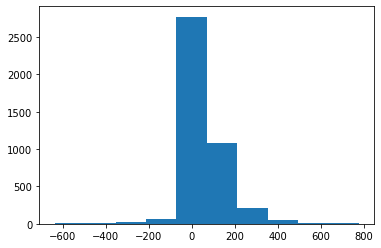

In [12]:
# Verificación del sesgo Profit 
x = df.Profit
plt.hist(x)
plt.show
mean = df.Profit.mean()
median =df.Profit.median()
mode = df.Profit.mode()

Columns = ["mean","Median","Mode"]
rows = [mean, median, mode]
data_f = pd.DataFrame(rows, Columns)
data_f

In [13]:

df.loc[df['Profit'] <0, 'Profit'] = df.Profit.median()

### Inventory 

In [14]:
# Verificación variables negativas Inventory 
df_2 = df.loc[df["Inventory"]< 0] 
df_2

,Area_code,State,Market,Market_size,Profit,Margin,Sales,COGS,Total_expenses,Marketing,Inventory,Budget_profit,Budget_COGS,Budget_margin,Budget_sales,Product_ID,Date,Product_type,Product,Type
252,225,louisiana,south,small market,40,75,127,53,73,48,-267,10,40,70,110,4,2011-01-06,2,caffe latte,0
253,225,louisiana,south,small market,40,66,112,47,67,42,-395,0,40,50,90,4,2011-01-07,2,caffe latte,0
254,225,louisiana,south,small market,40,76,140,55,79,49,-1053,0,40,60,100,4,2011-01-12,2,caffe latte,0
347,254,texas,south,major market,44,96,160,64,52,21,-161,50,50,80,130,4,2010-01-05,2,caffe latte,0
424,281,texas,south,major market,30,79,131,52,49,17,-456,40,40,70,110,4,2010-01-07,2,caffe latte,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,985,louisiana,south,small market,3,90,154,64,87,58,-113,10,50,80,130,4,2010-01-05,2,caffe latte,0
4243,985,louisiana,south,small market,40,66,113,47,72,42,-395,0,40,50,90,4,2010-01-07,2,caffe latte,0
4244,985,louisiana,south,small market,40,61,105,44,68,39,-508,10,30,60,90,4,2010-01-08,2,caffe latte,0
4245,985,louisiana,south,small market,40,76,131,55,79,49,-1053,0,40,60,100,4,2010-01-12,2,caffe latte,0


,0
mean,749.381356
Median,619.0
Mode,0 777 dtype: int64


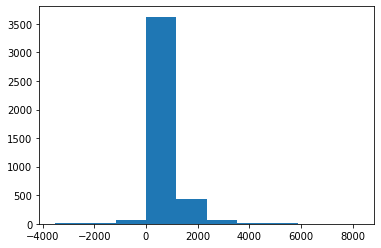

In [15]:
#Verificación sesgo Inventory 
x = df.Inventory
plt.hist(x)
plt.show
mean = df.Inventory.mean()
median =df.Inventory.median()
mode = df.Inventory.mode()

Columns = ["mean","Median","Mode"]
rows = [mean, median, mode]
data_I = pd.DataFrame(rows, Columns)
data_I

In [16]:
#Reemplazando valores negativos por la mediana variable Inventory 
df.loc[df['Inventory'] <0, 'Inventory'] = df.Profit.median()

### Realizar analisis de correlaciones de las vaiables

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area_code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market_size     4248 non-null   object        
 4   Profit          4248 non-null   int64         
 5   Margin          4248 non-null   int64         
 6   Sales           4248 non-null   int64         
 7   COGS            4248 non-null   int64         
 8   Total_expenses  4248 non-null   int64         
 9   Marketing       4248 non-null   int64         
 10  Inventory       4248 non-null   int64         
 11  Budget_profit   4248 non-null   int64         
 12  Budget_COGS     4248 non-null   int64         
 13  Budget_margin   4248 non-null   int64         
 14  Budget_sales    4248 non-null   int64         
 15  Prod

In [18]:
df.describe()

,Area_code,Profit,Margin,Sales,COGS,Total_expenses,Marketing,Inventory,Budget_profit,Budget_COGS,Budget_margin,Budget_sales,Product_ID,Product_type,Type
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,582.278013,73.835923,104.293315,192.987524,84.433145,54.063559,31.185028,769.943974,60.913371,74.830508,100.819209,175.649718,6.887006,1.525424,0.435028
std,221.140310,81.705419,94.342522,151.133127,67.249769,32.352598,27.023264,609.060985,79.546123,66.238145,92.602725,148.891522,3.664072,1.115346,0.495819
min,203.000000,0.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,9.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000,0.000000,0.000000
25%,417.000000,28.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000,1.000000,0.000000
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000,2.000000,0.000000
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000,2.000000,1.000000
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000,3.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

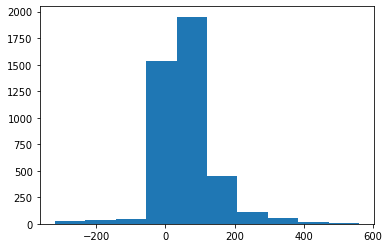

In [19]:
#Sesgo de Budget_profit
x = df.Budget_profit
plt.hist(x)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

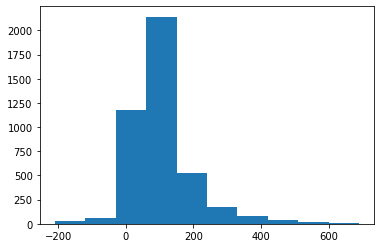

In [20]:
#Sesgo de Budget_margin
x = df.Budget_margin
plt.hist(x)
plt.show

<p><a name="corr"></a></p>

# Correlaciones 

In [21]:
#Tabla de correlaciones 
df.corr()

,Area_code,Profit,Margin,Sales,COGS,Total_expenses,Marketing,Inventory,Budget_profit,Budget_COGS,Budget_margin,Budget_sales,Product_ID,Product_type,Type
Area_code,1.000000,0.058233,0.029278,0.055220,0.080471,0.044552,0.051232,0.083227,0.011994,0.063720,0.022871,0.042572,0.024297,-0.005664,-0.006906
Profit,0.058233,1.000000,0.871402,0.889832,0.725140,0.449021,0.481544,0.332136,0.827730,0.703345,0.854126,0.844122,-0.037524,-0.052319,-0.060132
Margin,0.029278,0.871402,1.000000,0.938809,0.678797,0.521254,0.531947,0.124549,0.922812,0.680549,0.963460,0.901981,-0.079595,-0.029499,-0.041287
Sales,0.055220,0.889832,0.938809,1.000000,0.886651,0.689350,0.710515,0.388095,0.815435,0.862882,0.920757,0.956538,-0.048077,-0.014181,-0.028333
COGS,0.080471,0.725140,0.678797,0.886651,1.000000,0.782534,0.818271,0.668491,0.514967,0.947762,0.688587,0.849901,0.002142,0.010891,-0.002376
Total_expenses,0.044552,0.449021,0.521254,0.689350,0.782534,1.000000,0.966167,0.472340,0.255811,0.744259,0.530776,0.661217,-0.073369,-0.003027,-0.050237
Marketing,0.051232,0.481544,0.531947,0.710515,0.818271,0.966167,1.000000,0.534826,0.279315,0.773709,0.543039,0.681946,-0.042227,0.027757,-0.035181
Inventory,0.083227,0.332136,0.124549,0.388095,0.668491,0.472340,0.534826,1.000000,0.038357,0.619788,0.178819,0.386944,0.038843,-0.021147,0.028295
Budget_profit,0.011994,0.827730,0.922812,0.815435,0.514967,0.255811,0.279315,0.038357,1.000000,0.579176,0.949637,0.848285,-0.147758,-0.080941,-0.031808
Budget_COGS,0.063720,0.703345,0.680549,0.862882,0.947762,0.744259,0.773709,0.619788,0.579176,1.000000,0.750422,0.911598,-0.156683,-0.085994,-0.009656


<AxesSubplot:>

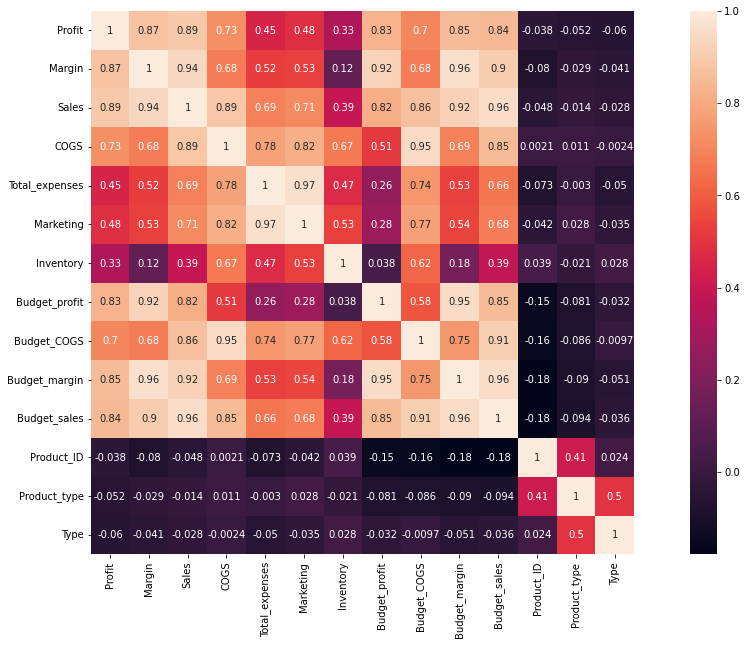

In [22]:

#Mapa de calor correlacion de variables 
df_1 = df.iloc[:, 3:20]
df_corr = df_1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, square=True, annot = True)


<p><a name="selec"></a></p>

# Seleccion de variables para el modelo predictivo

#### Las variables seleccionadas para el modelo de regresión lineal fueron : 
Inventory, Total_expenses, Marketing, Budget_pofit, Budget_COGS, Budget_margin, Budget-sales

esto debido a la alta correlacion que tienen, es util para entrenar el modelo y poder quedar mas cerca de la predicción 

In [23]:
#Variable         # Correlación       

#Inventory            0.39                                               
#Total_expenses       0.69
#Marketing            0.71 
#Budget_profit        0.82
#Budget_COGS          0.86
#Budget_margin        0.92                    
#Budget_sales         0.96


Se procede analizar graficamente cada variable seleccionada de la correlación con la variable Sales 

________________________________________


,Sales,Marketing
Sales,1.000000,0.710515
Marketing,0.710515,1.000000


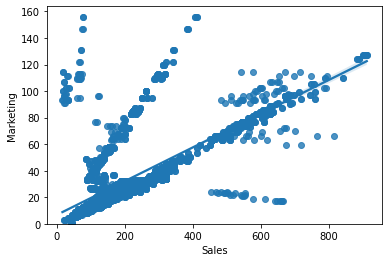

In [24]:
#Marketing
sns.regplot(x ="Sales", y = "Marketing", data = df )
plt.ylim(0,)
print('_'*40)
df[["Sales", "Marketing"]].corr()

,Sales,Budget_profit
Sales,1.000000,0.815435
Budget_profit,0.815435,1.000000


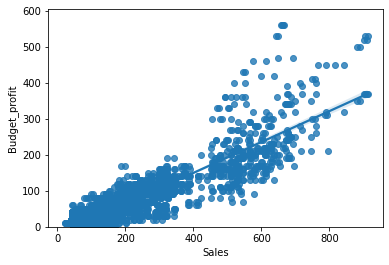

In [25]:
#Budget_profit
sns.regplot(x ="Sales", y = "Budget_profit", data = df )
plt.ylim(0,)
df[["Sales", "Budget_profit"]].corr()

,Sales,Total_expenses
Sales,1.00000,0.68935
Total_expenses,0.68935,1.00000


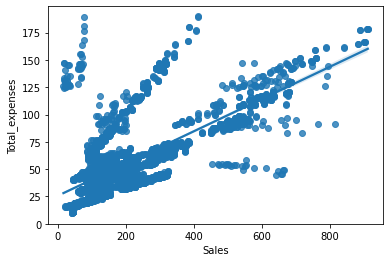

In [26]:
#Total_expenses
sns.regplot(x ="Sales", y = "Total_expenses", data = df )
plt.ylim(0,)
df[["Sales", "Total_expenses"]].corr()

,Sales,Inventory
Sales,1.000000,0.388095
Inventory,0.388095,1.000000


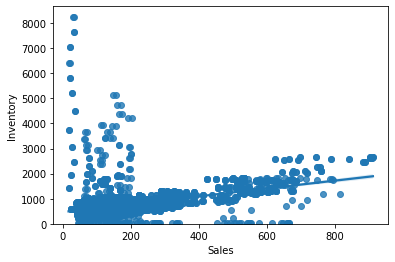

In [27]:
#Inventory 
sns.regplot(x ="Sales", y = "Inventory", data = df )
plt.ylim(0,)
df[["Sales", "Inventory"]].corr()

,Sales,Budget_COGS
Sales,1.000000,0.862882
Budget_COGS,0.862882,1.000000


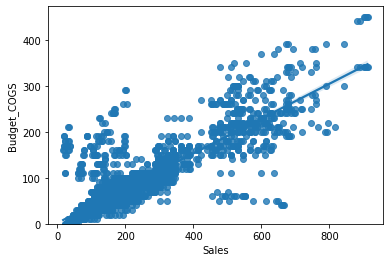

In [28]:
#Budget_COGS

sns.regplot(x ="Sales", y = "Budget_COGS", data = df )
plt.ylim(0,)
df[["Sales", "Budget_COGS"]].corr()

,Sales,Budget_sales
Sales,1.000000,0.956538
Budget_sales,0.956538,1.000000


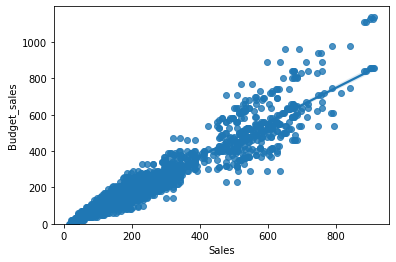

In [29]:
#Budget_sales
sns.regplot(x ="Sales", y = "Budget_sales", data = df )
plt.ylim(0,)
df[["Sales", "Budget_sales"]].corr()

,Sales,Budget_margin
Sales,1.000000,0.920757
Budget_margin,0.920757,1.000000


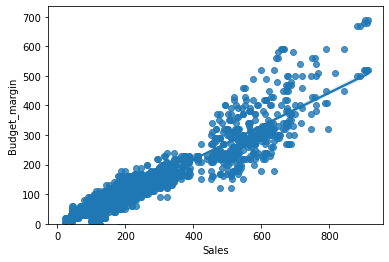

In [30]:
#Budget_margin
sns.regplot(x ="Sales", y = "Budget_margin", data = df )
plt.ylim(0,)
df[["Sales", "Budget_margin"]].corr()

<p><a name="selmod"></a></p>

# Selección del modelo 

Los modelos que se pueden utilizar para la predicción son : regresion lineal, vecinos mas cercaos y arbol de deciones 

Los veremos todos para asi cmprobar cual se ajusta mas 

In [31]:
# Algoritmos seleccionados 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Metricas 
from sklearn.model_selection import train_test_split

#### Almacenamiento 

In [32]:
# Almacenar Variables seleccionadoas para el algoritmo 
Car_select =["Budget_margin","Budget_sales","Budget_COGS","Inventory","Total_expenses","Budget_profit", "Marketing"]
#Almacenar la variable objetivo 
obj_select = df.Sales

# Almacenar datos en variables pequeñas para manipular datos en el modelo 
X = df[Car_select]
y = obj_select

In [33]:
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size = 0.20, random_state = 42)

 ### Regresión lineal 

In [34]:
Reg_model = LinearRegression() 
Reg_model.fit (X,y)

LinearRegression()

In [35]:
print(Reg_model.predict(X.head()))
print(df.Sales.head())

[291.74581684 238.91409627 325.17077215 285.46887577 231.59853516]
0    292
1    225
2    325
3    289
4    223
Name: Sales, dtype: int64


In [36]:
Reg_model.score(X,y)

0.944160385961773

### Arbol de decisiones

In [37]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X, y)

DecisionTreeRegressor()

In [38]:
print(DT_model.predict(X.head()))
print(df.Sales.head())

[301.5 225.  335.5 298.5 223. ]
0    292
1    225
2    325
3    289
4    223
Name: Sales, dtype: int64


In [39]:
DT_model.score(X,y)

0.9985195459635388

### Random Forest 

In [40]:
DG_model =GradientBoostingRegressor()
DG_model.fit(X, y)

GradientBoostingRegressor()

In [41]:
print(DG_model.predict(X.head()))
print(df.Sales.head())

[297.00565782 239.13313734 330.15455485 297.96405983 239.13313734]
0    292
1    225
2    325
3    289
4    223
Name: Sales, dtype: int64


In [42]:
DG_model.score(X,y)

0.9877034180789472

<p><a name="comp"></a></p>

## Comparación de predicciones 

In [43]:
y_pred = Reg_model.predict(X=df[["Budget_margin","Budget_sales","Budget_COGS","Inventory","Total_expenses","Budget_profit", "Marketing"]])
y_pred1 = DT_model.predict(X=df[["Budget_margin","Budget_sales","Budget_COGS","Inventory","Total_expenses","Budget_profit", "Marketing"]])
y_pred2 = DG_model.predict(X=df[["Budget_margin","Budget_sales","Budget_COGS","Inventory","Total_expenses","Budget_profit", "Marketing"]])

df.insert (0, "Pred_RL",y_pred)
df.insert (1, "Pred_DT",y_pred1)
df.insert (2, "Pred_DG",y_pred2)

In [44]:
df.head()

,Pred_RL,Pred_DT,Pred_DG,Area_code,State,Market,Market_size,Profit,Margin,Sales,...,Inventory,Budget_profit,Budget_COGS,Budget_margin,Budget_sales,Product_ID,Date,Product_type,Product,Type
0,291.745817,301.5,297.005658,203,connecticut,east,small market,107,176,292,...,962,110,110,160,270,2,2010-01-04,0,columbian,0
1,238.914096,225.0,239.133137,203,connecticut,east,small market,75,135,225,...,1148,90,80,130,210,2,2010-01-07,0,columbian,0
2,325.170772,335.5,330.154555,203,connecticut,east,small market,122,195,325,...,1134,130,110,180,290,2,2010-01-11,0,columbian,0
3,285.468876,298.5,297.964060,203,connecticut,east,small market,105,174,289,...,1166,110,100,160,260,2,2010-01-12,0,columbian,0
4,231.598535,223.0,239.133137,203,connecticut,east,small market,104,135,223,...,1148,90,80,130,210,2,2011-01-07,0,columbian,0


In [45]:
Columns =df.Pred_RL,df.Pred_DT,df.Pred_DG, df.Sales
rows = ["Pred_RL","Pred_DT","Pred_DG","Sales"]
data_p= pd.DataFrame(Columns,rows)
data_p.head()

,0,1,2,3,4,5,6,7,8,9,...,4238,4239,4240,4241,4242,4243,4244,4245,4246,4247
Pred_RL,291.745817,238.914096,325.170772,285.468876,231.598535,231.545074,277.827952,341.232337,325.170772,55.634553,...,169.081320,158.762729,138.647001,151.734811,165.254171,130.102014,124.356781,137.182964,151.734811,154.280829
Pred_DT,301.500000,225.000000,335.500000,298.500000,223.000000,223.000000,266.500000,323.500000,335.500000,51.000000,...,199.500000,167.000000,155.000000,155.000000,154.000000,113.000000,105.000000,135.500000,155.000000,153.000000
Pred_DG,297.005658,239.133137,330.154555,297.964060,239.133137,239.133137,284.510790,304.844866,330.154555,52.380009,...,190.418232,180.529700,155.916938,150.890168,155.427511,115.897379,118.918132,125.976276,150.890168,151.958093
Sales,292.000000,225.000000,325.000000,289.000000,223.000000,223.000000,275.000000,334.000000,346.000000,51.000000,...,206.000000,167.000000,160.000000,150.000000,154.000000,113.000000,105.000000,131.000000,160.000000,153.000000


<p><a name="compr"></a></p>

## Comparación de resultados

In [46]:
score1=DT_model.score(X,y)
score2=DG_model.score(X,y)
score3=Reg_model.score(X,y)

In [47]:
Columns =score1*100,score2*100,score3*100, 
rows = ["DT_model","DG_model","Reg_model"]
data_p= pd.DataFrame(Columns,rows)
data_p

,0
DT_model,99.851955
DG_model,98.770342
Reg_model,94.416039


<p><a name="conc"></a></p>

# Conclusiones

***Se elige el modelo de arbol de decisiones por tener un mejor resultado en el momento de aplicar los modelos de regresión,  para este caso nuestro modelo fue de 99.85%***